                                        ~ BHARATH BOMMEESHWAR K ~

### <U> Problem Statement 
<font color= green> Customer behavior and booking possibilities have been radically changed by online hotel reservation channels. Cancellations or no-shows cause a significant number of hotel reservations to be canceled. Cancellations can be caused by a variety of factors, such as scheduling conflicts, changes in plans, etc. In many cases, this is made easier by the possibility of doing so free or at a low cost, which is beneficial for hotel guests but less desirable and possibly revenue-diminishing for hotels.
As a Data Scientist, your job is to build a Machine Learning model to help the Hotel Owners better understand if the customer is going to honor the reservation or cancel it ?

### <U>Objective

To build a optimal Machine learning model to predict whether the rooms reserved by the guest will be honored or cancelled. Thereby helping the hotel owners to reduce the diminishing revenue.

### <U>Frame work
   - Data acquistion
   - Exploratory Data Analysis - Univariate and bivariate
   - Data pre-processing 
   - Building machine learning model
   - Models evaluation 
   - Models testing
   - Recommendations
   - Conclusion  

### 1. Data Acquisition

In [2]:
#datastructures and tools
import pandas as pd

#matrices and arrays
import numpy as np

#vizualizations
import seaborn as sns
import matplotlib.pyplot as plt

#to hide harmless warnings
import warnings
warnings.filterwarnings('ignore')

#to work with time computation
import time

#Resampling 
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

#scientific computation
from scipy import stats
import statsmodels.formula.api as sm

# scale the data
from sklearn.preprocessing import StandardScaler
# split the data
from sklearn.model_selection import train_test_split
# cross validation - grid search
from sklearn.model_selection import GridSearchCV
#linear regression model
from sklearn.linear_model import LinearRegression
#knn neighbour model
from sklearn.neighbors import KNeighborsClassifier
#decision tree model
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
#adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
#Bagging model
from sklearn.ensemble import BaggingClassifier

#for cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#measure accuracy of predictions
from sklearn import metrics
#to get complete classification report
from sklearn.metrics import classification_report

#to check accuracy 
from sklearn import metrics as mat

In [58]:
#Importing the Train data set
raw_data=pd.read_csv('train_dataset.csv')
raw_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [59]:
#making copy of the data set
data1 = raw_data.copy()
data1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

1.Booking_ID: unique identifier of each booking  
2.No of adults: Number of adults  
3.No of children: Number of Children  
4.noofweekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel  
5.noofweek_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel  
6.typeofmeal_plan: Type of meal plan booked by the customer    
7.requiredcarparking_space: Does the customer require a car parking space? (0 - No, 1- Yes)  
8.roomtypereserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels  
9.lead_time: Number of days between the date of booking and the arrival date  
10.arrival_year: Year of arrival date  
11.arrival_month: Month of arrival date  
12.arrival_date: Date of the month  
13.Market segment type: Market segment designation    
14.repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)  
15.noofprevious_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking  
16.noofpreviousbookingsnot_canceled: Number of previous bookings not canceled by the customer prior to the current booking  
17.avgpriceper_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)  
18.noofspecial_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)  
19.booking_status: Flag indicating if the booking was canceled or not.  

####  <font color= BLUE> <b> <u>The dataset contains totally 17 variables and 18137 train observations
  - 2 Numerical variables    
  - 10 Discrete numerical  
  - 5 Categorical variables(1 target_included ~ 0-Not cancelled/1-Cancelled)   

### 2.Exploratory Data Analysis

In [61]:
# Identifying the presence of null values
data1.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* Fortunately, we dont see any missing values.If found they should be treated appropriately.  
* Based on the skewness of continuous data mean or median can be employed.  
* Whereas for categorical variable mode can be used.  
* In the case of class imbalanced target variable conditional mean / conditional median is used to fill the respective independent variables.  

In [62]:
# Checking for any duplicate entries
duplicates1=data1.duplicated()
print("Duplicates count:",duplicates1.sum())

#However if the target is imbalanced, it need to balanced by making duplicates(using smote)

Duplicates count: 4111


In [63]:
#lets try without removing duplicates since we dont have the customerid we cannot be very sure about the duplicates
data1.duplicated().sum()

4111

In [64]:
#numerical variables
data1.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000
mean,1.846777,0.107515,0.811104,2.208965,0.318465,0.031648,0.336770,85.377405,2017.820698,7.432762,15.660804,0.806197,0.025087,0.022440,0.151403,103.478868,0.617522,0.327618
std,0.516020,0.408901,0.873470,1.426365,0.629140,0.175066,0.772865,86.611736,0.383616,3.076999,8.772788,0.645972,0.156393,0.370078,1.714135,35.474103,0.787941,0.469357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.270000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


#### 2.1.Univariate analysis

In [65]:
#variables
data1.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

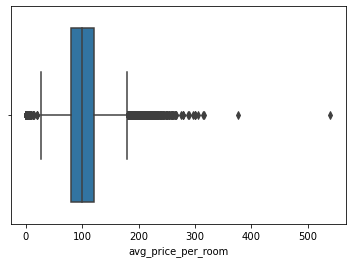

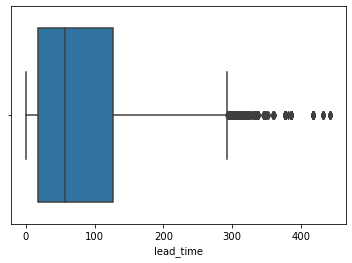

In [66]:
#Numerical variables
num = ['avg_price_per_room','lead_time']
for i in num:
    sns.boxplot(data1[i])
    plt.show()

In [67]:
#frequency of the levels in each categorical variables
list = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved','arrival_month',
       'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'booking_status']

for i in list:
    frq_table=pd.crosstab(data1[i],columns="Frequency")
    print(frq_table)
    print("_"*100)
    

col_0         Frequency
no_of_adults           
0                    67
1                  3809
2                 13104
3                  1150
4                     7
____________________________________________________________________________________________________
col_0           Frequency
no_of_children           
0                   16767
1                     814
2                     544
3                      10
9                       2
____________________________________________________________________________________________________
col_0                 Frequency
no_of_weekend_nights           
0                          8444
1                          4985
2                          4535
3                            84
4                            56
5                            19
6                            13
7                             1
____________________________________________________________________________________________________
col_0              Frequenc

<AxesSubplot:xlabel='avg_price_per_room'>

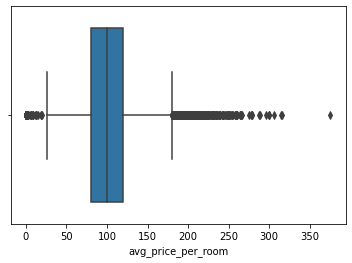

In [22]:
#check distribution after removing outlier
sns.boxplot(data1['avg_price_per_room'])

In [23]:
data1['avg_price_per_room'].describe()

count    18137.000000
mean       103.454578
std         35.325707
min          0.000000
25%         80.300000
50%         99.450000
75%        120.180000
max        375.500000
Name: avg_price_per_room, dtype: float64

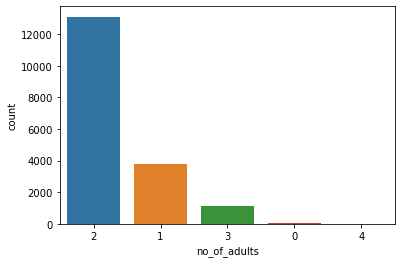

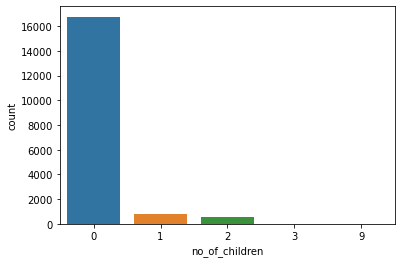

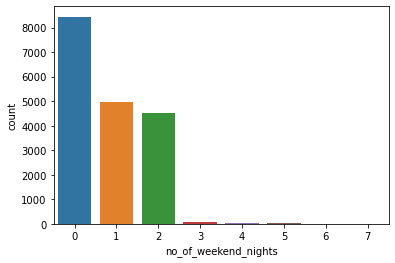

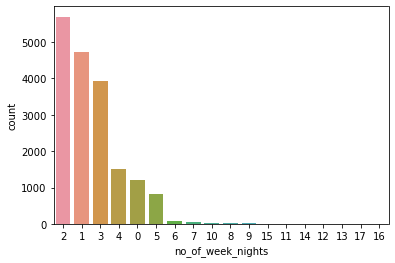

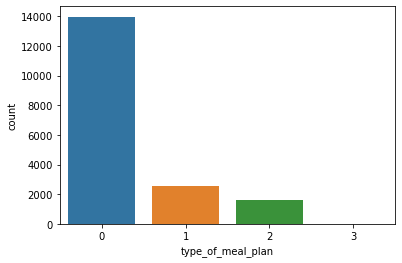

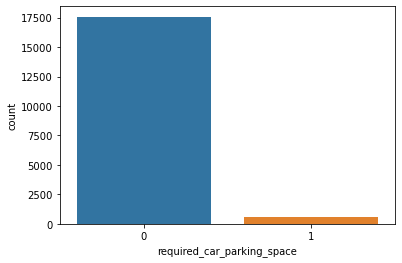

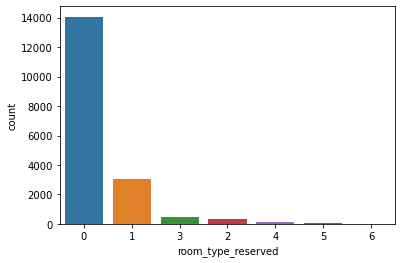

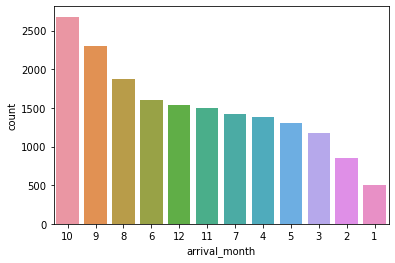

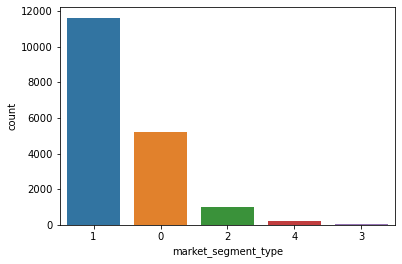

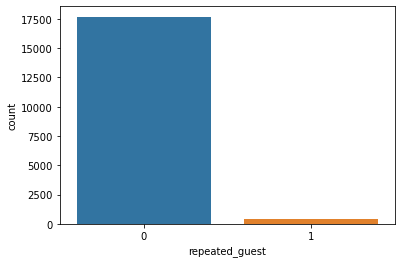

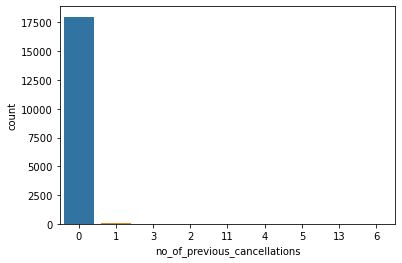

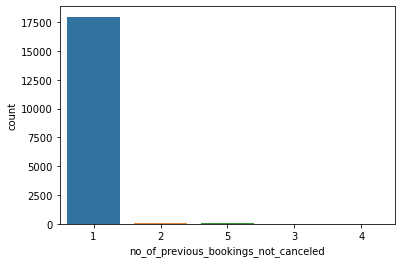

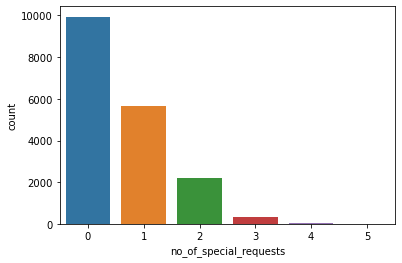

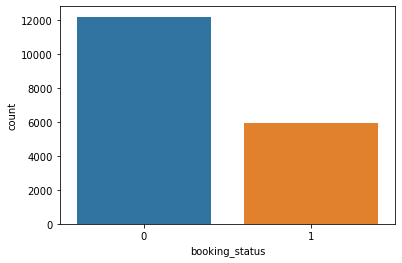

In [72]:
#bar plot
for i in list:
    sns.countplot(data1[i],order=data1[i].value_counts().index)
    plt.show()

In [114]:
#Percentage wise frequency
for i in list:
    table=pd.crosstab(data1[i],columns="Frequency")
    clarity_coltotal=table.sum(axis=0)
    print(table.div(clarity_coltotal,axis=1)*100)


col_0         Frequency
no_of_adults           
0              0.369411
1             21.001268
2             72.250096
3              6.340630
4              0.038595
col_0           Frequency
no_of_children           
0               92.446380
1                4.488063
2                2.999394
3                0.055136
9                0.011027
col_0                 Frequency
no_of_weekend_nights           
0                     46.556762
1                     27.485251
2                     25.004135
3                      0.463142
4                      0.308761
5                      0.104758
6                      0.071677
7                      0.005514
col_0              Frequency
no_of_week_nights           
0                   6.660418
1                  26.062745
2                  31.405414
3                  21.646358
4                   8.297954
5                   4.515631
6                   0.496223
7                   0.314275
8                   0.165408
9          

#### 2.2. Bivariate Analysis

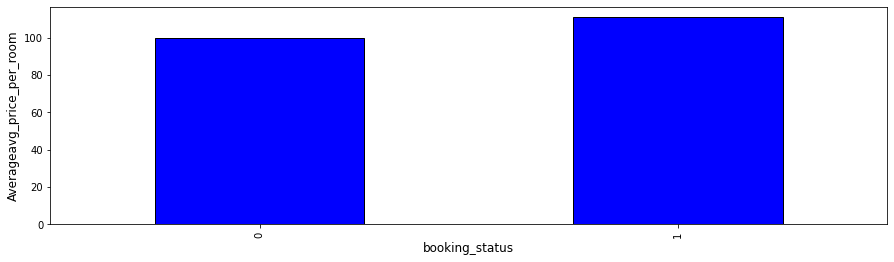

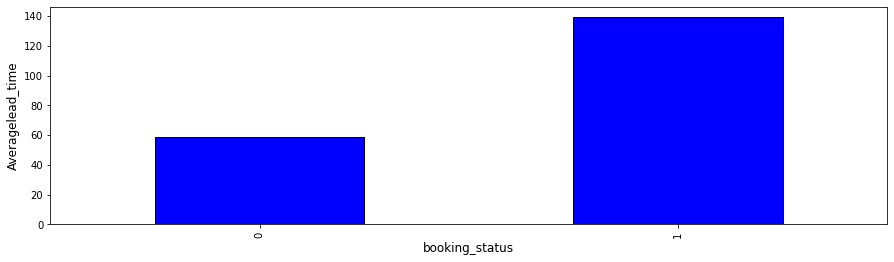

In [74]:
#numerical variables with target
num = ['avg_price_per_room','lead_time']
for i in num:    
    data1.groupby(['booking_status'])[i].mean().plot(kind='bar',figsize=(15,4),color="blue",fontsize=10,edgecolor="black")
    plt.xlabel('booking_status',fontsize=12)
    plt.ylabel('Average'+ i,fontsize=12)
    plt.show()

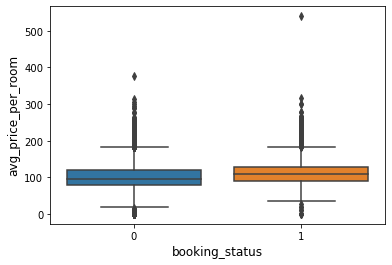

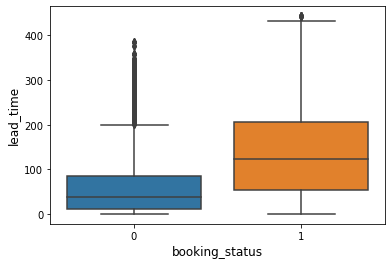

In [75]:
#Box plot
num = ['avg_price_per_room','lead_time']
for i in num:     
    sns.boxplot(x="booking_status",y=i,data=data1)
    plt.xlabel('booking_status',fontsize=12)
    plt.ylabel(i,fontsize=12)
    plt.show()

<Figure size 360x360 with 0 Axes>

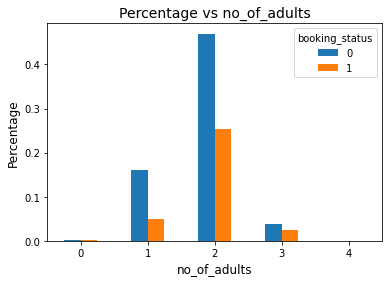

<Figure size 360x360 with 0 Axes>

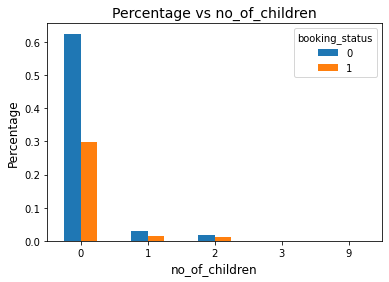

<Figure size 360x360 with 0 Axes>

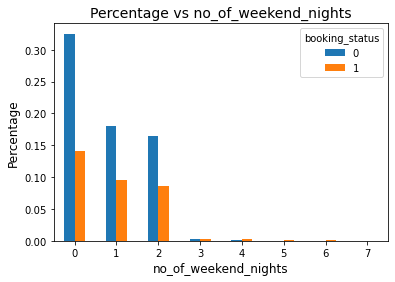

<Figure size 360x360 with 0 Axes>

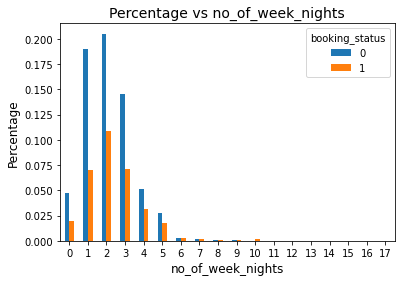

<Figure size 360x360 with 0 Axes>

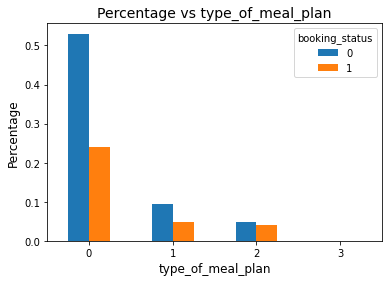

<Figure size 360x360 with 0 Axes>

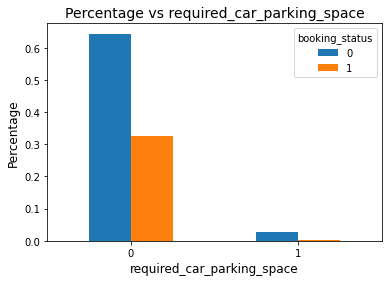

<Figure size 360x360 with 0 Axes>

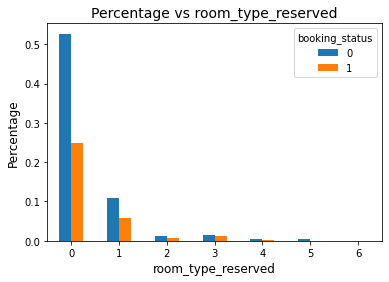

<Figure size 360x360 with 0 Axes>

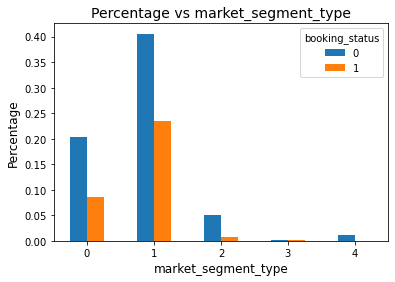

<Figure size 360x360 with 0 Axes>

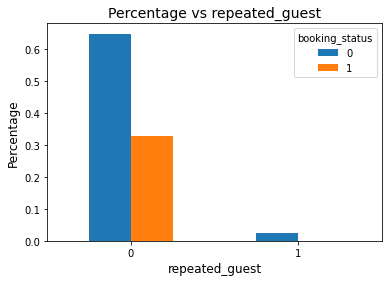

<Figure size 360x360 with 0 Axes>

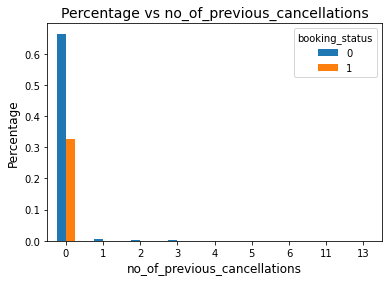

<Figure size 360x360 with 0 Axes>

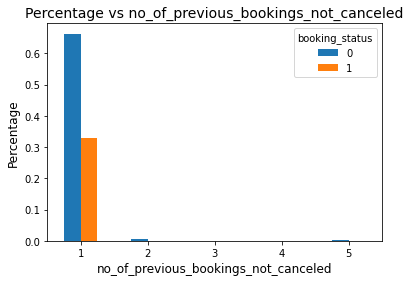

<Figure size 360x360 with 0 Axes>

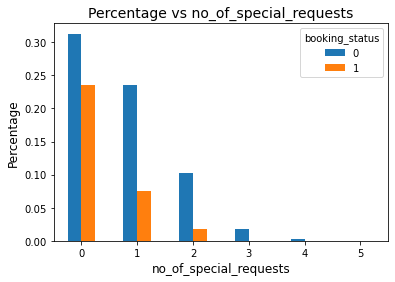

In [77]:
# Groupby aggregate using barplot (catergorical / discrete numerical with target)

cat_disc = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved',
       'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests']

for i in cat_disc:    
    plt.figure(figsize=(5,5))
    pd.crosstab(data1[i], data1['booking_status'],normalize=True).plot(kind='bar',rot=0)
    
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Percentage',fontsize=12)
    plt.title('Percentage' + ' vs '+i ,fontsize=14)
    plt.show()
   

#### INSIGHTS:

### 3. DATA PREPROCESSING

* Binning 

* BINNING

In [69]:
# Lets bin the variable "no_of_previous_bookings_not_canceled" since it has lot of very less frequent numbers
for i in range(len(data1['no_of_previous_bookings_not_canceled'])):
    if data1['no_of_previous_bookings_not_canceled'][i] <= 3:
        data1['no_of_previous_bookings_not_canceled'][i] = 1
    elif data1['no_of_previous_bookings_not_canceled'][i]>3 and data1['no_of_previous_bookings_not_canceled'][i]<=6:
        data1['no_of_previous_bookings_not_canceled'][i] = 2
    elif data1['no_of_previous_bookings_not_canceled'][i]>6 and data1['no_of_previous_bookings_not_canceled'][i]<=9:
        data1['no_of_previous_bookings_not_canceled'][i] = 3
    elif data1['no_of_previous_bookings_not_canceled'][i]>9 and data1['no_of_previous_bookings_not_canceled'][i]<=12:
        data1['no_of_previous_bookings_not_canceled'][i] = 4
    else:
        data1['no_of_previous_bookings_not_canceled'][i] = 5    

In [71]:
data1['no_of_previous_bookings_not_canceled'].value_counts()

1    17965
2      112
5       36
3       15
4        9
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [83]:
# Binning variable "number of children"
for i in range(len(data1['no_of_children'])):
    if data1['no_of_children'][i] == 0:
        data1['no_of_children'][i] = 1
        continue
    elif data1['no_of_children'][i]==2:
        data1['no_of_children'][i] = 2
        continue
    else:
        data1['no_of_children'][i] = 3
        

In [85]:
data1['no_of_children'].value_counts()

1    16766
3      827
2      544
Name: no_of_children, dtype: int64

* Dealing with outliers

In [21]:
# the last datapoint in avg_price_room seemed to be an outlier so lets replace with median(skewed)
data1['avg_price_per_room'][319] = np.median(data1['avg_price_per_room'])
data1['avg_price_per_room'][319] 

99.45

<AxesSubplot:xlabel='avg_price_per_room'>

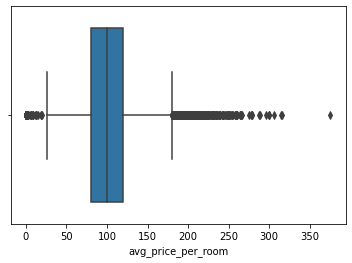

In [22]:
#check distribution after removing outlier
sns.boxplot(data1['avg_price_per_room'])

In [23]:
data1['avg_price_per_room'].describe()

count    18137.000000
mean       103.454578
std         35.325707
min          0.000000
25%         80.300000
50%         99.450000
75%        120.180000
max        375.500000
Name: avg_price_per_room, dtype: float64

In [283]:

data1['avg_price_per_room'][319] 

103.45479874283252

In [284]:
data1["booking_status"].value_counts()

0    12195
1     5942
Name: booking_status, dtype: int64

* The dataset is highly imbalanced , it shouldbe balanced for the model to train evenly on all classes

In [285]:
# splitting dependent and indepenent variable
X = data1.drop("booking_status",axis=1)
y = data1.booking_status

In [122]:
X.drop([ 'arrival_year','arrival_month',
      'arrival_date'],axis=1,inplace=True)

In [286]:
X = pd.get_dummies(X,columns=['market_segment_type','type_of_meal_plan','room_type_reserved'],drop_first=True)
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,market_segment_type_4,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6
0,2,0,1,4,0,118,2017,12,28,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,2,0,17,2018,4,14,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,5,0,349,2018,10,4,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,2,4,0,69,2018,6,12,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,4,0,11,2018,1,20,0,...,0,1,0,0,0,0,0,0,0,0


#### SPLITTING DATASET

In [287]:
#Splitting the data TRAIN TEST
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [288]:
print(X_train.shape)
print(X_test.shape)

(13602, 27)
(4535, 27)


In [245]:
y_train.value_counts()/len(y_train)

0    0.672401
1    0.327599
Name: booking_status, dtype: float64

* BALANCING THE DATASET USING SMOTE

In [127]:
#pip install imblearn==0.0
#from imblearn.over_sampling import BorderlineSMOTE
#from imblearn.over_sampling import SVMSMOTE

Class=0, n=9146 (50.000%)
Class=1, n=9146 (50.000%)


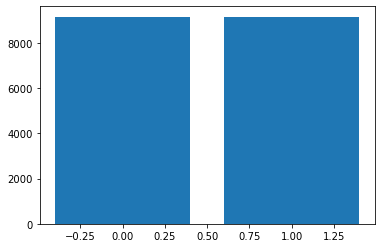

In [289]:
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [247]:
y_train.value_counts()/len(y_train)

0    0.5
1    0.5
Name: booking_status, dtype: float64

### 4.BUILDING MACHINE LEARNING MODELS

#### MODEL PERFORMANCE USING THEIR DEFAULT PARAMETER

In [310]:
#models
dt = DecisionTreeClassifier(random_state=42) #decision tree
rf = RandomForestClassifier(random_state=42) #random forest
ab = AdaBoostClassifier(random_state=42) #adaboost
gb = GradientBoostingClassifier(random_state=42) #gradientboost
knn = KNeighborsClassifier() #knn 
bc = BaggingClassifier(random_state=42) #bagging

In [311]:
# evaluate a model using kfold cross validation
def evaluate_model(X, y, model):
     # 5folds 10times on differnt samples(random state is not specified)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
     # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return np.mean(scores)

In [312]:
#cross validation scores on train data
L = [dt,rf,ab,gb,knn,bc]
for i in L:
    res = evaluate_model(X_train, y_train, i)
    print(i,":",res)
#note: this can be done before splitting the data into validation set    

DecisionTreeClassifier(random_state=42) : 0.872621952267311
RandomForestClassifier(random_state=42) : 0.9089984760122474
AdaBoostClassifier(random_state=42) : 0.8141754993155579
GradientBoostingClassifier(random_state=42) : 0.8416301962057651
KNeighborsClassifier() : 0.813858511656138
BaggingClassifier(random_state=42) : 0.8996885156711936


In [313]:
# default model performance on test data
for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = mat.accuracy_score(y_test,pred)
    print(i,":",score)

DecisionTreeClassifier(random_state=42) : 0.8485115766262403
RandomForestClassifier(random_state=42) : 0.8780595369349504
AdaBoostClassifier(random_state=42) : 0.7927232635060639
GradientBoostingClassifier(random_state=42) : 0.8224917309812569
KNeighborsClassifier() : 0.760529217199559
BaggingClassifier(random_state=42) : 0.8672546857772878


##### PLOT GRAPH OF FEATURE IMPORTANCE USING RANDOM FOREST MODEL

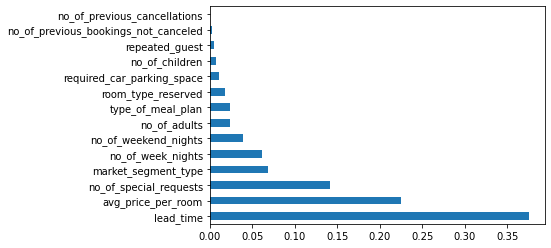

In [136]:
#Using random forest (default parameters)
rf.fit(X_train,y_train)

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

#### MODEL PERFORMANCE USING THEIR OPTIMAL PARAMETER

### <font color= BLUE>DECISION FOREST  

In [67]:
#Finding best parameters using grid search cv
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

start = time.time()

# Hyper parameters range intialization for tuning 
param_grid = {
            "max_depth" : [3,5,7,9,11],
            "min_samples_leaf":[1,2,3,4,5],
            "max_leaf_nodes":[25,35,45,55,65],
            "min_samples_split": [2,3,4,5,6]
           }

#Gridsearch on different combination of parameter
CV_dt2 = GridSearchCV(estimator=dt, param_grid=param_grid, cv = 10)
CV_dt2.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

#Best parameters
CV_dt2.best_params_

timetaken: 3.03 min


{'max_depth': 11,
 'max_leaf_nodes': 55,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

#### MODEL VALIDATION

In [290]:
#Fitting tree with best parameters
dt2 = DecisionTreeClassifier(max_depth = 11,max_leaf_nodes = 55,min_samples_leaf= 1,min_samples_split= 2,random_state=42)
dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=55, random_state=42)

In [291]:
#Prediction on validation data
y_pred = dt2.predict(X_test)

Accuracy : 0.834619625137817
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3049
           1       0.73      0.78      0.76      1486

    accuracy                           0.83      4535
   macro avg       0.81      0.82      0.82      4535
weighted avg       0.84      0.83      0.84      4535



<AxesSubplot:>

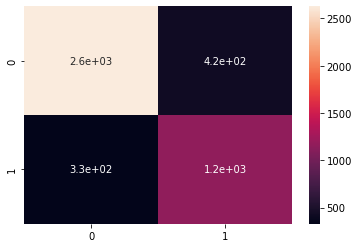

In [292]:
#accuracy score
dt2_acc = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",dt2_acc)
#print("f1",mat.f1_score(y_valid,y_pred,average='macro'))
print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### <font color= BLUE>RANDOM FOREST  

In [68]:
#Finding best parameter for RF model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

start = time.time()

# Hyper parameters range intialization for tuning 
param_grid = {
             "bootstrap": [True, False],
            "max_depth" : range(3,20,3),
            "max_leaf_nodes": range(10,60,10),
            "max_features":["log2","sqrt"],#log2 = log(n_features),sqrt = sqrt(n_features)
            "n_estimators":[100,150,200],
            "min_samples_leaf":[3,4,5],
            "min_samples_split": [2,3,4],
            "criterion" :["gini", "entropy"] #split based on least gini impurity ,high information gain(entropy)
             }

#Gridsearch (5fold_cv) 
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=-1,verbose=1)
CV_rf.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

#Best parameters
CV_rf.best_params_

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits
timetaken: 294.70180136760075 min


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'log2',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 200}

#### MODEL VALIDATION

In [320]:
#Fitting tree with best parameters
rf2 = RandomForestClassifier(criterion='gini',max_depth = 18,max_features = 'log2',max_leaf_nodes = 50,
                             min_samples_leaf = 5,min_samples_split = 3,n_estimators = 300,bootstrap=False,random_state=42)
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=18, max_features='log2',
                       max_leaf_nodes=50, min_samples_leaf=5,
                       min_samples_split=3, n_estimators=300, random_state=42)

In [321]:
#Prediction on validation data
y_pred = rf2.predict(X_test)

Accuracy : 0.8264608599779493
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      3049
           1       0.71      0.79      0.75      1486

    accuracy                           0.83      4535
   macro avg       0.80      0.82      0.81      4535
weighted avg       0.83      0.83      0.83      4535



<AxesSubplot:>

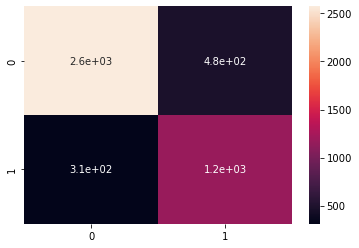

In [322]:
#accuracy score
rf2_acc = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",rf2_acc)

print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### <font color= BLUE> ADAPTIVE BOOSTING

In [69]:
#Finding best parameter for Adaboost model
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)

start = time.time()

# Hyper parameters range intialization for tuning  (base_estimator will be decision tree)
param_grid = {
    'n_estimators': range(100, 141, 5),
     }

#Gridsearch on different combination of parameter
CV_ab = GridSearchCV(estimator=ab, param_grid=param_grid, cv= 5)
CV_ab.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

#Best parameters
CV_ab.best_params_

timetaken: 0.93 min


{'n_estimators': 140}

#### MODEL VALIDATION

In [299]:
ab2 = AdaBoostClassifier(n_estimators = 140,random_state=42)
ab2.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=140, random_state=42)

In [300]:
#Prediction on validation data
y_pred = ab2.predict(X_test)

Accuracy : 0.7969128996692393
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      3049
           1       0.67      0.76      0.71      1486

    accuracy                           0.80      4535
   macro avg       0.77      0.79      0.78      4535
weighted avg       0.81      0.80      0.80      4535



<AxesSubplot:>

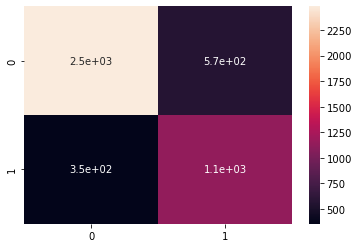

In [301]:
#accuracy score
ab2_acc = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",ab2_acc)

print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### <font color= BLUE> GRADIENT BOOSTING

In [226]:
# Finding the best parameter
start = time.time()

grid = {
        'max_depth':[4,6,8],
        'learning_rate':[0.01,0.05,0.1],
        'n_estimators':np.arange(100,500,100)
       }

#Initializing gradient boosting object
gb = GradientBoostingClassifier()
#Gridsearch and cross validating on different conbination of hyperparameters
gb_cv = GridSearchCV(gb, grid, cv = 5)
gb_cv.fit(X_train,y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("valid Score:",gb_cv.score(X_test,y_test))


KeyboardInterrupt



#### MODEL VALIDATION

In [227]:
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,1,0,0,0,25,2018,10,10,0,0,0,0,95.000000,1
1,2,0,0,2,0,0,0,134,2018,8,4,1,0,0,0,105.300000,1
2,1,0,2,5,0,0,1,3,2018,9,11,1,0,0,0,179.710000,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.000000,0
4,2,0,1,2,0,0,0,214,2018,9,23,0,0,0,0,80.750000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18287,2,0,0,4,0,0,0,253,2018,5,4,0,0,0,0,90.000000,0
18288,2,0,0,3,0,0,0,105,2018,10,12,1,0,0,0,75.000000,0
18289,1,0,0,3,0,0,0,214,2018,8,16,1,0,0,0,90.912435,0
18290,2,0,0,3,0,0,0,213,2018,6,7,0,0,0,0,130.000000,0


In [302]:
gb2 = GradientBoostingClassifier(learning_rate = 0.01, max_depth =8, n_estimators = 400,random_state=42)
gb2.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, n_estimators=400,
                           random_state=42)

In [303]:
#Prediction on validation data
y_pred = gb2.predict(X_test)

Accuracy : 0.8723263506063947
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3049
           1       0.81      0.80      0.80      1486

    accuracy                           0.87      4535
   macro avg       0.86      0.85      0.85      4535
weighted avg       0.87      0.87      0.87      4535



<AxesSubplot:>

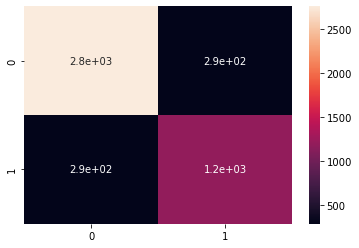

In [304]:
#accuracy score
gb2_acc = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",gb2_acc)

print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### <font color= BLUE> USING KNN MODEL

In [231]:
# Finding the best parameter
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

#Initializing knn classifier
knn = KNeighborsClassifier()

#Gridsearch and cross validating on different combination of hyperparameters
knn_cv = GridSearchCV(knn, grid_params, cv = 5,n_jobs=-1,verbose=1)
knn_cv.fit(X_train,y_train)

print("Best Parameters:",knn_cv.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


####  MODEL VALIDATION

In [234]:
#Prediction on validation data 
y_pred = knn_cv.predict(X_test) 

Accuracy : 0.7832414553472988
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3049
           1       0.65      0.75      0.69      1486

    accuracy                           0.78      4535
   macro avg       0.76      0.77      0.76      4535
weighted avg       0.80      0.78      0.79      4535



<AxesSubplot:>

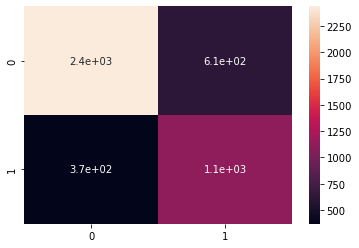

In [235]:
#accuracy score
knn_acc = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",knn_acc)

print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### <font color= BLUE> USING BAGGING CLASSIFIER

In [305]:
# Finding the best parameter
grid_params = { 'n_estimators' : [100,150,200,300]}

#Initializing knn classifier
bc = BaggingClassifier()

#Gridsearch and cross validating on different combination of hyperparameters
bc_cv = GridSearchCV(bc, grid_params,cv = 5,n_jobs=-1,verbose=1)
bc_cv.fit(X_train,y_train)

print("Best Parameters:",bc_cv.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'n_estimators': 150}


####  MODEL VALIDATION

In [306]:
bcc = BaggingClassifier(n_estimators = 300)
bcc.fit(X_train,y_train)

BaggingClassifier(n_estimators=300)

In [307]:
#Prediction on validation data 

y_pred = bcc.predict(X_test) 

Accuracy : 0.8760749724366041
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3049
           1       0.81      0.81      0.81      1486

    accuracy                           0.88      4535
   macro avg       0.86      0.86      0.86      4535
weighted avg       0.88      0.88      0.88      4535



<AxesSubplot:>

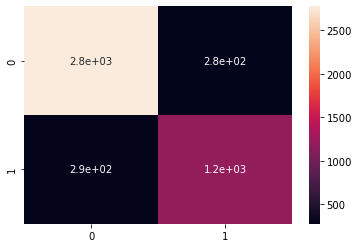

In [308]:
#accuracy score
bc_acc = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",bc_acc)

print(classification_report(y_test, y_pred))

cm = mat.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### 5.RESULT

In [323]:
final_result = pd.DataFrame({"Validation score":[dt2_acc,rf2_acc,ab2_acc,gb2_acc,knn_acc,bc_acc]
                             
                      },index=["Decision tree","Random forest","Adaptive boosting",
                              "Gradient boosting","Knn model","Bagging classifier"])
final_result

,Validation score
Decision tree,0.834620
Random forest,0.826461
Adaptive boosting,0.796913
Gradient boosting,0.872326
Knn model,0.783241
Bagging classifier,0.876075


In [163]:
test_data = pd.read_csv("test_dataset.csv")
test_data.drop([ 'arrival_year', 'arrival_month','arrival_date'],axis=1,inplace=True)

In [171]:
test_data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,1,0,65,1,0,0,0,96.3,0
1,2,0,0,2,0,0,0,322,0,0,0,0,52.0,0
2,1,0,2,3,0,0,0,115,0,0,0,0,75.0,0
3,2,0,2,0,2,0,0,386,1,0,0,0,115.0,1
4,2,0,1,4,0,0,1,51,1,0,0,0,123.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18133,2,0,1,3,0,0,1,37,1,0,0,0,95.4,1
18134,1,0,1,2,0,0,0,40,1,0,0,0,169.2,0
18135,2,0,2,2,0,0,0,144,0,0,0,0,112.0,0
18136,2,0,0,2,0,0,1,30,1,0,0,0,116.3,1


In [174]:
#try1
predictions = pd.DataFrame(knn_cv.predict(test_data)) 
res = pd.DataFrame(predictions)  
res.index = test_data.index 
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False) 


In [175]:
#try2
predictions = gb2.predict(test_data)
res = pd.DataFrame(predictions)  
res.index = test_data.index 
res.columns = ["booking_status"]
res.to_csv("prediction_results.csv", index = False) 